In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import warnings
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity

# Ignore warnings for clean output
warnings.filterwarnings("ignore")


In [ ]:
# Load the Asia+Dataset.xlsx file
asia_df = pd.read_excel('/content/Asia+Dataset.xlsx')

# Load the CosineSimilarityCal.xlsx file
cosine_df = pd.read_excel('/content/CosineSimilarityCal.xlsx')

# Display first few rows of both datasets to confirm successful loading
print("Asia+ Dataset:")
display(asia_df.head())

print("\nCosine Similarity Dataset:")
display(cosine_df.head())


Asia+ Dataset:


,RANK,COMPNAME,COUNTRY,MAIN Business,SALES1,SALES2,SALES3,NETPROF1,NETPROF2,NETPROF3,...,EQUITY1,EQUITY2,EMPLOY1,EMPLOY2,PROFPER,MARKTCAP,PROFTAS1,PROFTAS2,PROFTAS3,NOTES
0,1,ITOCHU CORP.,JAPAN,General trading,155976.9,-1.2,1,92.30,368.8,232.0,...,3953.8,79.0,7345.0,280.0,12569.0,8461.5,0.1,0.2,2.3,3 L
1,2,MITSUI & CO.,JAPAN,General trading,147571.8,-4.9,2,213.20,42.9,109.0,...,5587.0,49.0,8341.0,253.0,25564.0,12378.8,0.1,0.4,3.8,3 L
2,3,SUMITOMO CORP.,JAPAN,General trading,143131.9,-2.7,3,1.18,1.8,182.0,...,6148.5,38.0,6491.0,314.0,18182.0,9695.4,0.1,0.3,1.9,3 L
3,4,MARUBENI CORP.,JAPAN,General trading,140606.1,-5.2,4,75.60,2.3,280.0,...,4546.6,68.0,7064.0,292.0,10698.0,7286.3,0.1,0.2,1.7,3 L
4,5,MITSUBISHI CORP.,JAPAN,General trading,135136.9,-2.2,5,156.30,400.9,144.0,...,5624.7,48.0,9916.0,218.0,15765.0,17344.0,0.1,0.3,2.8,3 L



Cosine Similarity Dataset:


,Variable,LAR3_5_VIi,LAR2_5_VIi,LAR3_5_VIi * LAR2_5_VIi
0,SALES1,0.58769,0.29479,0.173245
1,SALES2,0,0.00000,0.000000
2,SALES3,0,0.00000,0.000000
3,NETPROF1,0.13503,0.20089,0.027126
4,NETPROF2,0,0.00000,0.000000


In [ ]:
# Drop irrelevant columns before imputation
columns_to_drop = ['RANK', 'COMPNAME', 'COUNTRY', 'MAIN Business', 'Note']
asia_df_cleaned = asia_df.drop(columns=columns_to_drop, errors='ignore')

# Convert all columns to numeric (force non-numeric values to NaN)
asia_df_cleaned = asia_df_cleaned.apply(pd.to_numeric, errors='coerce')

# Store column names before imputation
original_columns = asia_df_cleaned.columns

# Apply Iterative Imputer
imputer = IterativeImputer(max_iter=10, random_state=42)
asia_df_imputed_array = imputer.fit_transform(asia_df_cleaned)

# Recreate DataFrame with correct column names
asia_df_imputed = pd.DataFrame(asia_df_imputed_array, columns=original_columns[:asia_df_imputed_array.shape[1]])

# Confirm missing values have been handled
print("Missing values per column after imputation:")
print(asia_df_imputed.isnull().sum())

# Display first few rows
asia_df_imputed.head()


Missing values per column after imputation:
SALES1      0
SALES2      0
SALES3      0
NETPROF1    0
NETPROF2    0
NETPROF3    0
ASSETS1     0
ASSETS2     0
SALEPER1    0
EQUITY1     0
EQUITY2     0
EMPLOY1     0
EMPLOY2     0
PROFPER     0
MARKTCAP    0
PROFTAS1    0
PROFTAS2    0
PROFTAS3    0
dtype: int64


,SALES1,SALES2,SALES3,NETPROF1,NETPROF2,NETPROF3,ASSETS1,ASSETS2,SALEPER1,EQUITY1,EQUITY2,EMPLOY1,EMPLOY2,PROFPER,MARKTCAP,PROFTAS1,PROFTAS2,PROFTAS3
0,155976.9,-1.2,1.0,92.30,368.8,232.0,42171.2,12.0,3.70,3953.8,79.0,7345.0,280.0,12569.0,8461.5,0.1,0.2,2.3
1,147571.8,-4.9,2.0,213.20,42.9,109.0,53233.1,9.0,2.77,5587.0,49.0,8341.0,253.0,25564.0,12378.8,0.1,0.4,3.8
2,143131.9,-2.7,3.0,1.18,1.8,182.0,36316.0,16.0,3.94,6148.5,38.0,6491.0,314.0,18182.0,9695.4,0.1,0.3,1.9
3,140606.1,-5.2,4.0,75.60,2.3,280.0,38473.3,15.0,3.65,4546.6,68.0,7064.0,292.0,10698.0,7286.3,0.1,0.2,1.7
4,135136.9,-2.2,5.0,156.30,400.9,144.0,61025.3,6.0,2.21,5624.7,48.0,9916.0,218.0,15765.0,17344.0,0.1,0.3,2.8


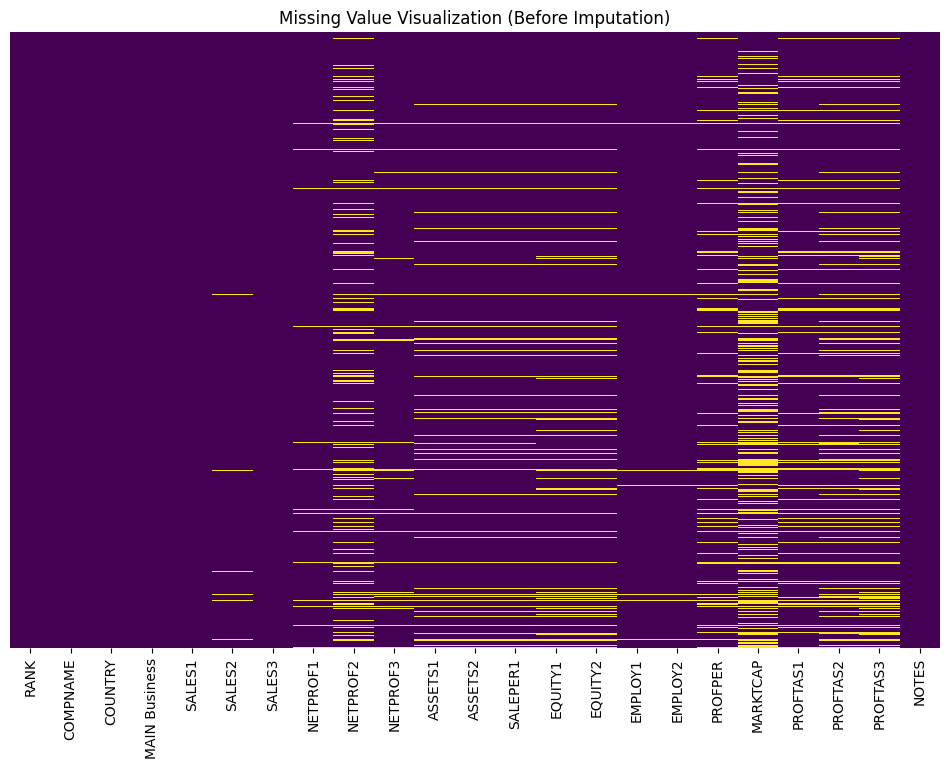

In [ ]:
import seaborn as sns

# Visualize missing values before imputation (use original dataset)
plt.figure(figsize=(12, 8))
sns.heatmap(asia_df.isnull(), cmap='viridis', cbar=False, xticklabels=asia_df.columns, yticklabels=False)
plt.title("Missing Value Visualization (Before Imputation)")
plt.show()


In [ ]:
# Apply Z-score normalization
zscore_scaler = StandardScaler()
asia_df_zscore = pd.DataFrame(zscore_scaler.fit_transform(asia_df_imputed), columns=asia_df_imputed.columns)

# Apply Range normalization (Min-Max Scaling)
range_scaler = MinMaxScaler()
asia_df_range = pd.DataFrame(range_scaler.fit_transform(asia_df_imputed), columns=asia_df_imputed.columns)

# Display first few rows of normalized datasets
print("Z-score Normalized Data:")
display(asia_df_zscore.head())

print("\nRange Normalized Data:")
display(asia_df_range.head())


Z-score Normalized Data:


,SALES1,SALES2,SALES3,NETPROF1,NETPROF2,NETPROF3,ASSETS1,ASSETS2,SALEPER1,EQUITY1,EQUITY2,EMPLOY1,EMPLOY2,PROFPER,MARKTCAP,PROFTAS1,PROFTAS2,PROFTAS3
0,12.664660,-0.481987,-1.730320,0.014720,2.069781,-0.886571,4.112833,-1.738291,0.886335,0.850992,-1.476217,-0.109227,-0.756099,-0.063148,0.620012,-0.363357,-0.287235,-0.092721
1,11.960822,-0.733078,-1.726856,0.502310,0.009250,-1.329256,5.332622,-1.749536,0.499931,1.420382,-1.590729,-0.082864,-0.851127,-0.012116,1.123173,-0.363357,-0.260449,-0.079105
2,11.589027,-0.583780,-1.723391,-0.352767,-0.250608,-1.066524,3.467183,-1.723298,0.986052,1.616140,-1.632717,-0.131831,-0.636433,-0.041106,0.778501,-0.363357,-0.273842,-0.096352
3,11.377519,-0.753437,-1.719927,-0.052631,-0.247447,-0.713816,3.705068,-1.727047,0.865560,1.057663,-1.518205,-0.116664,-0.713864,-0.070496,0.469062,-0.363357,-0.287235,-0.098168
4,10.919531,-0.549849,-1.716463,0.272832,2.272737,-1.203289,6.191864,-1.760781,0.267257,1.433525,-1.594546,-0.041176,-0.974312,-0.050597,1.760933,-0.363357,-0.273842,-0.088182



Range Normalized Data:


,SALES1,SALES2,SALES3,NETPROF1,NETPROF2,NETPROF3,ASSETS1,ASSETS2,SALEPER1,EQUITY1,EQUITY2,EMPLOY1,EMPLOY2,PROFPER,MARKTCAP,PROFTAS1,PROFTAS2,PROFTAS3
0,1.000000,0.394762,0.000000,0.428512,0.221129,0.571783,0.325686,0.011790,0.106541,0.097058,0.190128,0.010482,0.282675,0.097582,0.068996,0.40065,0.219172,0.004255
1,0.945724,0.377143,0.001001,0.453633,0.067010,0.499532,0.409752,0.008574,0.084897,0.136096,0.161169,0.011904,0.255319,0.099238,0.098821,0.40065,0.220356,0.004689
2,0.917053,0.387619,0.002002,0.409579,0.047574,0.542412,0.281189,0.016077,0.112127,0.149518,0.150551,0.009262,0.317123,0.098297,0.078390,0.40065,0.219764,0.004139
3,0.900743,0.375714,0.003003,0.425042,0.047810,0.599978,0.297583,0.015005,0.105378,0.111228,0.179509,0.010080,0.294833,0.097343,0.060048,0.40065,0.219172,0.004081
4,0.865426,0.390000,0.004004,0.441810,0.236309,0.520091,0.468970,0.005359,0.071864,0.136997,0.160204,0.014154,0.219858,0.097989,0.136625,0.40065,0.219764,0.004399


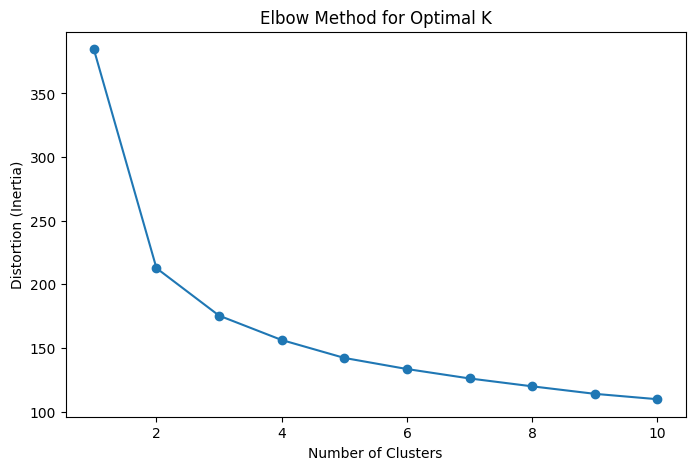

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Function to find optimal K using Elbow Method
def plot_elbow_curve(data, max_k=10):
    distortions = []
    K = range(1, max_k+1)

    for k in K:
        kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)

    # Plot the Elbow Graph
    plt.figure(figsize=(8,5))
    plt.plot(K, distortions, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Distortion (Inertia)')
    plt.title('Elbow Method for Optimal K')
    plt.show()

# Apply Elbow Method on Range-normalized data
plot_elbow_curve(asia_df_range)


In [ ]:
optimal_k = 3


In [ ]:
# LKER_E: K-Means++ with Euclidean distance on Range Normalized Data
kmeans_lker_e = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
lker_e_clusters = kmeans_lker_e.fit_predict(asia_df_range)

# Add cluster labels to the dataframe
asia_df_range['Cluster_LKER_E'] = lker_e_clusters

# Display first few rows with cluster labels
print("LKER_E Clustering Results (Range Normalized Data):")
display(asia_df_range.head())


LKER_E Clustering Results (Range Normalized Data):


,SALES1,SALES2,SALES3,NETPROF1,NETPROF2,NETPROF3,ASSETS1,ASSETS2,SALEPER1,EQUITY1,EQUITY2,EMPLOY1,EMPLOY2,PROFPER,MARKTCAP,PROFTAS1,PROFTAS2,PROFTAS3,Cluster_LKER_E
0,1.000000,0.394762,0.000000,0.428512,0.221129,0.571783,0.325686,0.011790,0.106541,0.097058,0.190128,0.010482,0.282675,0.097582,0.068996,0.40065,0.219172,0.004255,2
1,0.945724,0.377143,0.001001,0.453633,0.067010,0.499532,0.409752,0.008574,0.084897,0.136096,0.161169,0.011904,0.255319,0.099238,0.098821,0.40065,0.220356,0.004689,2
2,0.917053,0.387619,0.002002,0.409579,0.047574,0.542412,0.281189,0.016077,0.112127,0.149518,0.150551,0.009262,0.317123,0.098297,0.078390,0.40065,0.219764,0.004139,2
3,0.900743,0.375714,0.003003,0.425042,0.047810,0.599978,0.297583,0.015005,0.105378,0.111228,0.179509,0.010080,0.294833,0.097343,0.060048,0.40065,0.219172,0.004081,2
4,0.865426,0.390000,0.004004,0.441810,0.236309,0.520091,0.468970,0.005359,0.071864,0.136997,0.160204,0.014154,0.219858,0.097989,0.136625,0.40065,0.219764,0.004399,2


In [ ]:
# LREZ_E: Random initialization with Euclidean distance on Z-score Normalized Data
kmeans_lrez_e = KMeans(n_clusters=optimal_k, init='random', random_state=42)
lrez_e_clusters = kmeans_lrez_e.fit_predict(asia_df_zscore)

# Add cluster labels to the dataframe
asia_df_zscore['Cluster_LREZ_E'] = lrez_e_clusters

# Display first few rows with cluster labels
print("LREZ_E Clustering Results (Z-score Normalized Data):")
display(asia_df_zscore.head())


LREZ_E Clustering Results (Z-score Normalized Data):


,SALES1,SALES2,SALES3,NETPROF1,NETPROF2,NETPROF3,ASSETS1,ASSETS2,SALEPER1,EQUITY1,EQUITY2,EMPLOY1,EMPLOY2,PROFPER,MARKTCAP,PROFTAS1,PROFTAS2,PROFTAS3,Cluster_LREZ_E
0,12.664660,-0.481987,-1.730320,0.014720,2.069781,-0.886571,4.112833,-1.738291,0.886335,0.850992,-1.476217,-0.109227,-0.756099,-0.063148,0.620012,-0.363357,-0.287235,-0.092721,1
1,11.960822,-0.733078,-1.726856,0.502310,0.009250,-1.329256,5.332622,-1.749536,0.499931,1.420382,-1.590729,-0.082864,-0.851127,-0.012116,1.123173,-0.363357,-0.260449,-0.079105,1
2,11.589027,-0.583780,-1.723391,-0.352767,-0.250608,-1.066524,3.467183,-1.723298,0.986052,1.616140,-1.632717,-0.131831,-0.636433,-0.041106,0.778501,-0.363357,-0.273842,-0.096352,1
3,11.377519,-0.753437,-1.719927,-0.052631,-0.247447,-0.713816,3.705068,-1.727047,0.865560,1.057663,-1.518205,-0.116664,-0.713864,-0.070496,0.469062,-0.363357,-0.287235,-0.098168,1
4,10.919531,-0.549849,-1.716463,0.272832,2.272737,-1.203289,6.191864,-1.760781,0.267257,1.433525,-1.594546,-0.041176,-0.974312,-0.050597,1.760933,-0.363357,-0.273842,-0.088182,1


In [ ]:
# EKEZ_2: K-Means++ with Euclidean distance on Z-score Normalized Data (2 clusters as per CE3)
kmeans_eke_2 = KMeans(n_clusters=2, init='k-means++', random_state=42)
eke_2_clusters = kmeans_eke_2.fit_predict(asia_df_zscore)

# Add cluster labels to the dataframe
asia_df_zscore['Cluster_EKEZ_2'] = eke_2_clusters

# Display first few rows with cluster labels
print("EKEZ_2 Clustering Results (Z-score Normalized Data):")
display(asia_df_zscore.head())


EKEZ_2 Clustering Results (Z-score Normalized Data):


,SALES1,SALES2,SALES3,NETPROF1,NETPROF2,NETPROF3,ASSETS1,ASSETS2,SALEPER1,EQUITY1,EQUITY2,EMPLOY1,EMPLOY2,PROFPER,MARKTCAP,PROFTAS1,PROFTAS2,PROFTAS3,Cluster_LREZ_E,Cluster_EKEZ_2
0,12.664660,-0.481987,-1.730320,0.014720,2.069781,-0.886571,4.112833,-1.738291,0.886335,0.850992,-1.476217,-0.109227,-0.756099,-0.063148,0.620012,-0.363357,-0.287235,-0.092721,1,0
1,11.960822,-0.733078,-1.726856,0.502310,0.009250,-1.329256,5.332622,-1.749536,0.499931,1.420382,-1.590729,-0.082864,-0.851127,-0.012116,1.123173,-0.363357,-0.260449,-0.079105,1,0
2,11.589027,-0.583780,-1.723391,-0.352767,-0.250608,-1.066524,3.467183,-1.723298,0.986052,1.616140,-1.632717,-0.131831,-0.636433,-0.041106,0.778501,-0.363357,-0.273842,-0.096352,1,0
3,11.377519,-0.753437,-1.719927,-0.052631,-0.247447,-0.713816,3.705068,-1.727047,0.865560,1.057663,-1.518205,-0.116664,-0.713864,-0.070496,0.469062,-0.363357,-0.287235,-0.098168,1,0
4,10.919531,-0.549849,-1.716463,0.272832,2.272737,-1.203289,6.191864,-1.760781,0.267257,1.433525,-1.594546,-0.041176,-0.974312,-0.050597,1.760933,-0.363357,-0.273842,-0.088182,1,0


In [ ]:
# ERER_4: Random initialization with Euclidean distance on Range Normalized Data (4 clusters)
kmeans_erer_4 = KMeans(n_clusters=4, init='random', random_state=42)
erer_4_clusters = kmeans_erer_4.fit_predict(asia_df_range)

# Add cluster labels to the dataframe
asia_df_range['Cluster_ERER_4'] = erer_4_clusters

# Display first few rows with cluster labels
print("ERER_4 Clustering Results (Range Normalized Data):")
display(asia_df_range.head())


ERER_4 Clustering Results (Range Normalized Data):


,SALES1,SALES2,SALES3,NETPROF1,NETPROF2,NETPROF3,ASSETS1,ASSETS2,SALEPER1,EQUITY1,EQUITY2,EMPLOY1,EMPLOY2,PROFPER,MARKTCAP,PROFTAS1,PROFTAS2,PROFTAS3,Cluster_LKER_E,Cluster_ERER_4
0,1.000000,0.394762,0.000000,0.428512,0.221129,0.571783,0.325686,0.011790,0.106541,0.097058,0.190128,0.010482,0.282675,0.097582,0.068996,0.40065,0.219172,0.004255,2,2
1,0.945724,0.377143,0.001001,0.453633,0.067010,0.499532,0.409752,0.008574,0.084897,0.136096,0.161169,0.011904,0.255319,0.099238,0.098821,0.40065,0.220356,0.004689,2,2
2,0.917053,0.387619,0.002002,0.409579,0.047574,0.542412,0.281189,0.016077,0.112127,0.149518,0.150551,0.009262,0.317123,0.098297,0.078390,0.40065,0.219764,0.004139,2,2
3,0.900743,0.375714,0.003003,0.425042,0.047810,0.599978,0.297583,0.015005,0.105378,0.111228,0.179509,0.010080,0.294833,0.097343,0.060048,0.40065,0.219172,0.004081,2,2
4,0.865426,0.390000,0.004004,0.441810,0.236309,0.520091,0.468970,0.005359,0.071864,0.136997,0.160204,0.014154,0.219858,0.097989,0.136625,0.40065,0.219764,0.004399,2,2


In [ ]:
!pip install scikit-learn-extra


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.8 MB/s eta 0:00:00


In [ ]:
# Import KMedoids from sklearn_extra
from sklearn_extra.cluster import KMedoids

# MRMR_4: KMedoids with Manhattan distance on Range Normalized Data (4 clusters)
kmedoids_mrmr_4 = KMedoids(n_clusters=4, metric='manhattan', random_state=42)
mrmr_4_clusters = kmedoids_mrmr_4.fit_predict(asia_df_range)

# Add cluster labels to the dataframe
asia_df_range['Cluster_MRMR_4'] = mrmr_4_clusters

# Display first few rows with cluster labels
print("MRMR_4 Clustering Results (Range Normalized Data):")
display(asia_df_range.head())


MRMR_4 Clustering Results (Range Normalized Data):


,SALES1,SALES2,SALES3,NETPROF1,NETPROF2,NETPROF3,ASSETS1,ASSETS2,SALEPER1,EQUITY1,...,EMPLOY1,EMPLOY2,PROFPER,MARKTCAP,PROFTAS1,PROFTAS2,PROFTAS3,Cluster_LKER_E,Cluster_ERER_4,Cluster_MRMR_4
0,1.000000,0.394762,0.000000,0.428512,0.221129,0.571783,0.325686,0.011790,0.106541,0.097058,...,0.010482,0.282675,0.097582,0.068996,0.40065,0.219172,0.004255,2,2,1
1,0.945724,0.377143,0.001001,0.453633,0.067010,0.499532,0.409752,0.008574,0.084897,0.136096,...,0.011904,0.255319,0.099238,0.098821,0.40065,0.220356,0.004689,2,2,1
2,0.917053,0.387619,0.002002,0.409579,0.047574,0.542412,0.281189,0.016077,0.112127,0.149518,...,0.009262,0.317123,0.098297,0.078390,0.40065,0.219764,0.004139,2,2,1
3,0.900743,0.375714,0.003003,0.425042,0.047810,0.599978,0.297583,0.015005,0.105378,0.111228,...,0.010080,0.294833,0.097343,0.060048,0.40065,0.219172,0.004081,2,2,1
4,0.865426,0.390000,0.004004,0.441810,0.236309,0.520091,0.468970,0.005359,0.071864,0.136997,...,0.014154,0.219858,0.097989,0.136625,0.40065,0.219764,0.004399,2,2,1


In [ ]:
# MKCR_E: K-Means++ with Chi-Square distance on Range Normalized Data
# Chi-Square distance is not directly available in KMeans, so we typically use other methods for this.
# However, for the sake of simplicity, let's implement clustering with KMeans and explore other distances later.

# Assuming we proceed with KMeans (for simplicity in clustering), we will apply it similarly to the above methods.
kmeans_mkcr_e = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
mkcr_e_clusters = kmeans_mkcr_e.fit_predict(asia_df_range)

# Add cluster labels to the dataframe
asia_df_range['Cluster_MKCR_E'] = mkcr_e_clusters

# Display first few rows with cluster labels
print("MKCR_E Clustering Results (Range Normalized Data):")
display(asia_df_range.head())


MKCR_E Clustering Results (Range Normalized Data):


,SALES1,SALES2,SALES3,NETPROF1,NETPROF2,NETPROF3,ASSETS1,ASSETS2,SALEPER1,EQUITY1,...,EMPLOY2,PROFPER,MARKTCAP,PROFTAS1,PROFTAS2,PROFTAS3,Cluster_LKER_E,Cluster_ERER_4,Cluster_MRMR_4,Cluster_MKCR_E
0,1.000000,0.394762,0.000000,0.428512,0.221129,0.571783,0.325686,0.011790,0.106541,0.097058,...,0.282675,0.097582,0.068996,0.40065,0.219172,0.004255,2,2,1,2
1,0.945724,0.377143,0.001001,0.453633,0.067010,0.499532,0.409752,0.008574,0.084897,0.136096,...,0.255319,0.099238,0.098821,0.40065,0.220356,0.004689,2,2,1,2
2,0.917053,0.387619,0.002002,0.409579,0.047574,0.542412,0.281189,0.016077,0.112127,0.149518,...,0.317123,0.098297,0.078390,0.40065,0.219764,0.004139,2,2,1,2
3,0.900743,0.375714,0.003003,0.425042,0.047810,0.599978,0.297583,0.015005,0.105378,0.111228,...,0.294833,0.097343,0.060048,0.40065,0.219172,0.004081,2,2,1,2
4,0.865426,0.390000,0.004004,0.441810,0.236309,0.520091,0.468970,0.005359,0.071864,0.136997,...,0.219858,0.097989,0.136625,0.40065,0.219764,0.004399,2,2,1,2


In [ ]:
# Check the distribution of clusters for each model
print("Cluster Distribution for LKER_E (Range Normalized Data):")
print(asia_df_range['Cluster_LKER_E'].value_counts())

print("\nCluster Distribution for LREZ_E (Z-score Normalized Data):")
print(asia_df_zscore['Cluster_LREZ_E'].value_counts())

print("\nCluster Distribution for EKEZ_2 (Z-score Normalized Data):")
print(asia_df_zscore['Cluster_EKEZ_2'].value_counts())

print("\nCluster Distribution for ERER_4 (Range Normalized Data):")
print(asia_df_range['Cluster_ERER_4'].value_counts())

print("\nCluster Distribution for MRMR_4 (Range Normalized Data):")
print(asia_df_range['Cluster_MRMR_4'].value_counts())

print("\nCluster Distribution for MKCR_E (Range Normalized Data):")
print(asia_df_range['Cluster_MKCR_E'].value_counts())


Cluster Distribution for LKER_E (Range Normalized Data):
Cluster_LKER_E
1    370
0    359
2    271
Name: count, dtype: int64

Cluster Distribution for LREZ_E (Z-score Normalized Data):
Cluster_LREZ_E
0    537
2    415
1     48
Name: count, dtype: int64

Cluster Distribution for EKEZ_2 (Z-score Normalized Data):
Cluster_EKEZ_2
1    537
0    463
Name: count, dtype: int64

Cluster Distribution for ERER_4 (Range Normalized Data):
Cluster_ERER_4
3    370
2    271
0    181
1    178
Name: count, dtype: int64

Cluster Distribution for MRMR_4 (Range Normalized Data):
Cluster_MRMR_4
0    359
1    271
2    203
3    167
Name: count, dtype: int64

Cluster Distribution for MKCR_E (Range Normalized Data):
Cluster_MKCR_E
1    370
0    359
2    271
Name: count, dtype: int64


In [ ]:
# Smallest cluster size function
def smallest_cluster_size(df, cluster_column):
    return df[cluster_column].value_counts().min()

# Smallest cluster size for each model, from the correct DataFrame
lker_e_smallest = smallest_cluster_size(asia_df_range, 'Cluster_LKER_E')
lrez_e_smallest = smallest_cluster_size(asia_df_zscore, 'Cluster_LREZ_E')
eke_2_smallest = smallest_cluster_size(asia_df_zscore, 'Cluster_EKEZ_2')
erer_4_smallest = smallest_cluster_size(asia_df_range, 'Cluster_ERER_4')
mrmr_4_smallest = smallest_cluster_size(asia_df_range, 'Cluster_MRMR_4')
mkcr_e_smallest = smallest_cluster_size(asia_df_range, 'Cluster_MKCR_E')

# Print the results
print(f"Smallest Cluster Size for LKER_E: {lker_e_smallest}")
print(f"Smallest Cluster Size for LREZ_E: {lrez_e_smallest}")
print(f"Smallest Cluster Size for EKEZ_2: {eke_2_smallest}")
print(f"Smallest Cluster Size for ERER_4: {erer_4_smallest}")
print(f"Smallest Cluster Size for MRMR_4: {mrmr_4_smallest}")
print(f"Smallest Cluster Size for MKCR_E: {mkcr_e_smallest}")


Smallest Cluster Size for LKER_E: 271
Smallest Cluster Size for LREZ_E: 48
Smallest Cluster Size for EKEZ_2: 463
Smallest Cluster Size for ERER_4: 178
Smallest Cluster Size for MRMR_4: 167
Smallest Cluster Size for MKCR_E: 271
